# Week 4 handin

# Week 4 Exercise with Numpy

Use only numpy (not pandas) in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk)
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

#### Exercise 2  A bit harder (Extra only if you have the time)

1. From "Danmarks Statistik" download demographic data here:
https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1


2. clean up the data so it only contains numbers. (If you find this hard to do then Pandas can help (we will cover it next week)
```python
import pandas as pd 
url = 'url from above here'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df.to_csv('demografic_cleaned.csv',header=False, index=False)
```
Now you have csv data with columns: OMRÅDE;KØN;ALDER;TID;INDHOLD
3. Now load your demographic data with numpy. (Hint: use np.loadtxt() with dtype and delimiter).
4. Use file: BY_KODER_demographics.csv to get cities from the city codes
5. Now find out which city in 2020 has the highest percentage of men (gender code 1),(Hint: create a function to return summed up data by city code ala: def summed_by_city(city_code): returning pct_male 
6. Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020


## 02 Status
Alt er lavet!

## 03 Solution part 1

In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [228]:
# read data from csv file into 2d numpy array
filename = '../data/befkbhalderstatkode.csv'

bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}
dd = bef_stats_df
def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = dd[mask & (dd[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people


Human_in_city = (dd[:,0] == 2015)
Human_in_citys = np.array([number_of_people_per_neighbourhood(n, Human_in_city) for n in neighb.keys()])

neigbo = neighb.values()

def humans_in_citys():
    count = 1
    for persons in Human_in_citys:
        print("Persons ", persons, "in", neighb.get(count))
        count +=1


def var_plot(x,y):
    plt.bar(x, y, width=0.5, align='center')
    plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')
    plt.show()

def above_65():
    boolean_mask = ((dd[:,2] >= 65) & (dd[:,0] == 2015)) 
    Human_in_citys_above_65 = np.array([number_of_people_per_neighbourhood(n, boolean_mask) for n in neighb.keys()])
    return Human_in_citys_above_65

def above_65_and_nordic():
    boolean_mask = ((dd[:,2] >= 65) & (dd[:,0] == 2015)) 
    mask_nordic = ((dd[:,3] == 5120) | (dd[:,3] == 5110) | (dd[:,3] == 5106) | (dd[:,3] == 5104) & boolean_mask)
    Human_in_citys_above_65 = np.array([number_of_people_per_neighbourhood(n, mask_nordic) for n in neighb.keys()])
    return Human_in_citys_above_65


In [232]:
all_people_in_given_n = dd[(dd[:,1] == 2) & (dd[:,1] == 3)]
sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
print(sum_of_people)


def people_in_vest_and_east_bro():
    print(number_of_people_per_given_neighbourhood())
    unique_years = np.unique(dd[:,0]) # all yś where x is index 0 (which is year)
    Human_in_citys_above_65 = np.array([number_of_people_per_given_neighbourhood()])
    print(Human_in_citys_above_65)
    plt.plot(Human_in_citys_above_65)
    plt.show()

0


In [251]:
def change_in_osterbro_and_vesterbro():
    between_years_mask = (dd[:,0] >= 1992) & (dd[:,0] <= 2015)
    vesterbro_mask = (dd[:,1] == 4)
    osterbro_mask = (dd[:,1] == 2)
    people_from_osterbro = dd[osterbro_mask & between_years_mask]
    people_from_vesterbro = dd[vesterbro_mask & between_years_mask]
    year_list = list(set(people_from_vesterbro[:,0]))
    vesterbro_amount_list = []
    osterbro_amount_list = []
    for year in year_list:
        vesterbro_amount_list.append(people_from_vesterbro[(people_from_vesterbro[:,0] == year)][:,4].sum())
        osterbro_amount_list.append(people_from_osterbro[(people_from_osterbro[:,0] == year)][:,4].sum())
    
    plt.plot(year_list, vesterbro_amount_list, label="Vesterbro")
    plt.plot(year_list, osterbro_amount_list, label="Østerbro")
    plt.plot(year_list, np.add(osterbro_amount_list, vesterbro_amount_list), label="Total")
    plt.ylabel("Number Of People")
    plt.xlabel("Years")
    plt.title('Interesting Graph\nCheck it out')
    plt.legend()
    plt.show()
    
# years = np.unique(data[:,0])
# def summedByYear(year, area):
#     return np.sum(data[(data[:,0]==year) & area][:,4])
# ø_by_year = {year:summedByYear(year,data[:,1]==2) for year in years} # østerbro
# v_by_year = {year:summedByYear(year, data[:,1]==4) for year in years} # vesterbro
# label_ø = plt.plot(list(ø_by_year.keys()),list(ø_by_year.values()), label='Østerbro')
# label_v = plt.plot(list(v_by_year.keys()),list(v_by_year.values()), label='Vesterbro')
# plt.legend(loc="upper left")

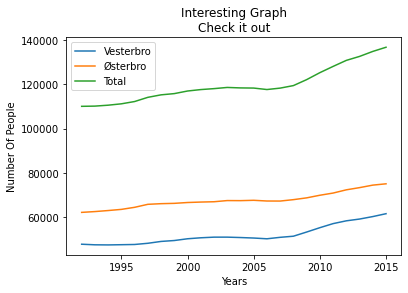

In [252]:
##humans_in_citys()
#var_plot(neigbo,Human_in_citys)
#var_plot(neigbo,above_65())
#var_plot(neigbo, above_65_and_nordic())
change_in_osterbro_and_vesterbro()

In [145]:
country_codes = {0: 'Uoplyst (1)', 5001: 'Uoplyst (2)', 5100: 'Danmark', 5101: 'Grønland', 
                 5102: 'Udlandet uoplyst', 5103: 'Statsløs', 5104: 'Finland', 
                 5105: 'Island, ligeret dansk', 5106: 'Island', 5107: 'Liechtenstein', 
                 5108: 'Luxembourg', 5109: 'Monaco', 5110: 'Norge', 5114: 'Europa uoplyst', 
                 5115: 'Kongelig', 5120: 'Sverige', 5122: 'Albanien', 5124: 'Andorra', 
                 5126: 'Belgien', 5128: 'Bulgarien', 5129: 'Tjekkoslovakiet', 
                 5130: 'Frankrig', 5134: 'Grækenland', 5140: 'Nederlandene', 
                 5142: 'Irland', 5150: 'Italien', 5151: 'Serbien og Montenegro', 
                 5152: 'Jugoslavien', 5153: 'Malta', 5154: 'Polen', 5156: 'Portugal', 
                 5158: 'Rumænien', 5159: 'San Marino', 5160: 'Schweiz', 
                 5162: 'Sovjetunionen', 5164: 'Spanien', 5170: 'Storbritannien', 
                 5172: 'Tyrkiet', 5174: 'Ungarn', 5176: 'Vatikanstaten', 5180: 'Tyskland', 
                 5182: 'Østrig', 5199: 'Europa uoplyst', 5202: 'Algeriet', 5204: 'Angola', 
                 5207: 'Botswana', 5213: 'Burundi', 5214: 'Etiopien', 5215: 'Comorerne', 
                 5216: 'Eritrea', 5222: 'Gambia', 5228: 'Ghana', 5230: 'Ækvatorialguinea', 
                 5231: 'Guinea-Bissau', 5232: 'Guinea', 5233: 'Kap Verde', 5234: 'Kenya', 
                 5235: 'Lesotho', 5236: 'Liberia', 5238: 'Libyen', 5240: 'Mozambique', 
                 5242: 'Madagaskar', 5243: 'Mali', 5244: 'Marokko', 5245: 'Mauritius', 
                 5246: 'Nigeria', 5247: 'Namibia', 5248: 'Marshalløerne', 
                 5255: 'Sierra Leone', 5258: 'Sudan', 5259: 'Swaziland', 5260: 'Sydsudan', 
                 5262: 'Sydafrika', 5266: 'Tanzania', 5268: 'Tunesien', 5269: 'Uganda', 
                 5272: 'Egypten', 5273: 'Tuvalu', 5274: 'Kiribati', 5275: 'Vanuatu', 
                 5276: 'Centralafrikanske Republik', 5277: 'Cameroun', 
                 5278: 'Congo, Demokratiske Republik', 5279: 'Congo, Republikken', 
                 5281: 'Benin', 5282: 'Elfenbenskysten', 5283: 'Gabon', 5284: 'Mauretanien', 
                 5285: 'Niger', 5287: 'Rwanda', 5288: 'Senegal', 5289: 'Somalia', 
                 5292: 'Tchad', 5293: 'Togo', 5294: 'Burkina Faso', 5295: 'Zimbabwe', 
                 5296: 'Zambia', 5297: 'Malawi', 5298: 'Seychellerne', 
                 5299: 'Afrika uoplyst', 5302: 'Argentina', 5303: 'Bahamas', 
                 5304: 'Bolivia', 5305: 'Barbados', 5306: 'Brasilien', 5308: 'Guyana', 
                 5309: 'Antigua og Barbuda', 5310: 'Nauru', 
                 5311: 'Skt. Vincent og Grenadinerne', 5314: 'Canada', 5316: 'Chile', 
                 5318: 'Colombia', 5319: 'Syd- og Mellemamerika uoplyst', 
                 5322: 'Costa Rica', 5324: 'Cuba', 5326: 'Dominikanske Republik', 
                 5328: 'Ecuador', 5338: 'Guatemala', 5339: 'Grenada', 5342: 'Haiti', 
                 5344: 'Surinam', 5345: 'Dominica', 5347: 'Skt. Lucia', 5348: 'Honduras', 
                 5352: 'Jamaica', 5354: 'Mexico', 5356: 'Nicaragua', 5358: 'Panama', 
                 5364: 'Paraguay', 5366: 'Peru', 5372: 'El Salvador', 
                 5374: 'Trinidad og Tobago', 5376: 'Uruguay', 5390: 'USA', 
                 5392: 'Venezuela', 5395: 'Vestindiske Øer', 5397: 'Nordamerika uoplyst', 
                 5398: 'Syd- og Mellemamerika uoplyst', 5402: 'Yemen', 
                 5403: 'Forenede Arabiske Emirater', 5404: 'Afghanistan', 5406: 'Bahrain', 
                 5408: 'Bhutan', 5410: 'Bangladesh', 5412: 'Brunei', 5414: 'Myanmar', 
                 5416: 'Cambodja', 5418: 'Sri Lanka', 5422: 'Cypern', 5424: 'Taiwan', 
                 5432: 'Indien', 5434: 'Indonesien', 5435: 'Østtimor', 5436: 'Irak', 
                 5438: 'Iran', 5442: 'Israel', 5444: 'Japan', 5446: 'Jordan', 5448: 'Kina', 
                 5452: 'Kuwait', 5454: 'Laos', 5456: 'Libanon', 5457: 'Maldiverne', 
                 5458: 'Malaysia', 5459: 'Mongoliet', 5462: 'Oman', 5464: 'Nepal', 
                 5466: 'Nordkorea', 5468: 'Vietnam (1)', 5471: 'Asien uoplyst', 
                 5472: 'Pakistan', 5474: 'Filippinerne', 5478: 'Saudi-Arabien', 
                 5482: 'Singapore', 5484: 'Sydkorea', 5486: 'Syrien', 
                 5487: 'Mellemøsten uoplyst', 5488: 'Vietnam (2)', 5492: 'Thailand', 
                 5496: 'Qatar', 5499: 'Asien uoplyst', 5502: 'Australien', 5505: 'Tonga', 
                 5508: 'Fiji', 5514: 'New Zealand', 5522: 'Samoa', 5525: 'Djibouti', 
                 5526: 'Belize', 5534: 'Papua Ny Guinea', 5599: 'Øer i Stillehavet', 
                 5607: 'Estland', 5609: 'Letland', 5611: 'Litauen', 
                 5621: 'Sao Tome og Principe', 5623: 'Salomonøerne', 
                 5625: 'Skt. Kitts og Nevis', 5700: 'Rusland', 5704: 'Ukraine', 
                 5706: 'Hviderusland', 5708: 'Armenien', 5710: 'Aserbajdsjan', 
                 5712: 'Moldova', 5714: 'Usbekistan', 5716: 'Kasakhstan', 
                 5718: 'Turkmenistan', 5720: 'Kirgisistan', 5722: 'Tadsjikistan', 
                 5724: 'Georgien', 5750: 'Kroatien', 5752: 'Slovenien', 
                 5754: 'Bosnien-Hercegovina', 5756: 'Makedonien', 5757: 'Serbien', 
                 5758: 'Jugoslavien, Forbundsrepublikken', 5759: 'Montenegro', 
                 5761: 'Kosovo', 5776: 'Tjekkiet', 5778: 'Slovakiet', 5779: 'Cookøerne', 
                 5800: 'Land ukendt (2)', 5901: 'Færøerne uoplyst', 5902: 'Færøerne', 
                 5999: 'Land ukendt (1)'}